This notebook contains functionality to perform the following:

Create the final Canola dataset from hidra.tsv. In this, we retain all features given to us in the unprocessed format, and add in nucleotide frequency features for each sequence. Only chloroplast rows are kept and chunks are trimmed. We create & visualize a feature "set", which indicates the train/test/val set that the row belongs to.

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
nchunks = 70
out_file_name = "data/processed/hidra_chloroplast_"+str(nchunks)+"_dropout.csv"
cut_outliers = True

In [ ]:
def trim(chunks):  # takes in list of dfs, returns list but with no overlaps
    chunks[0] = chunks[0][:-14]
    for i in range(1, len(chunks)-1):
        chunks[i] = chunks[i][14:-14]
    chunks[-1] = chunks[-1][14:]
    return chunks

In [ ]:
df = pd.read_csv('data/raw/hidra.tsv', sep="\t", header=None)

In [ ]:
df.columns = ["organelle", 
                 "start_coords", 
                 "end_coords", 
                 "sequence", 
                 "control_raw_coverage", 
                 "treatment_raw_coverage",
                 "control_norm_coverage",
                 "treatment_norm_coverage",
                 "target"]

In [ ]:
df

,organelle,start_coords,end_coords,sequence,control_raw_coverage,treatment_raw_coverage,control_norm_coverage,treatment_norm_coverage,target,A,T,C,G,CG,avg
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26,39,40,40,26,66,0.455172
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27,40,40,39,26,65,0.448276
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27,38,38,42,27,69,0.475862
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27,40,36,42,27,69,0.475862
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27,41,39,39,26,65,0.448276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74881,NC_008285.1,221685,221830,ATGGAGTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTG...,183,67,62.04,85.98,0.47,27,50,38,30,68,0.468966
74882,NC_008285.1,221690,221835,GTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCC...,179,67,60.68,85.98,0.50,27,51,39,28,67,0.462069
74883,NC_008285.1,221695,221840,GTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAA...,178,65,60.34,83.41,0.47,29,49,40,27,67,0.462069
74884,NC_008285.1,221700,221845,GCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAAGCCAA...,165,62,55.93,79.56,0.51,30,46,41,28,69,0.475862


In [ ]:
# count number of each NT in a sequence
for nt in ["A", "T", "C", "G"]:
    df[nt] = df["sequence"].str.count(nt)
df["CG"] = df["C"] + df["G"]
df["avg"] = df["CG"]/145

In [ ]:
# df = df.drop(columns=[1,2,4,5,6,7])
# df.columns = ["organelle","sequence","target"]

In [ ]:
df_chloro = df[df["organelle"] == "NC_016734.1"]
df_mito = df[df["organelle"] == "NC_008285.1"]

In [ ]:
df_chloro

,organelle,start_coords,end_coords,sequence,control_raw_coverage,treatment_raw_coverage,control_norm_coverage,treatment_norm_coverage,target,A,T,C,G,CG,avg
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26,39,40,40,26,66,0.455172
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27,40,40,39,26,65,0.448276
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27,38,38,42,27,69,0.475862
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27,40,36,42,27,69,0.475862
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27,41,39,39,26,65,0.448276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30539,NC_016734.1,152695,152840,GAGAAAATCGAATTTCTTTCTTCGTCTTAAAAAAAATAGGAGTTAA...,2239,555,759.00,712.22,-0.09,66,39,18,22,40,0.275862
30540,NC_016734.1,152700,152845,AATCGAATTTCTTTCTTCGTCTTAAAAAAAATAGGAGTTAATTAAC...,2115,514,716.97,659.61,-0.12,66,40,19,20,39,0.268966
30541,NC_016734.1,152705,152850,AATTTCTTTCTTCGTCTTAAAAAAAATAGGAGTTAATTAACTGTGA...,2062,492,699.00,631.38,-0.15,64,42,18,21,39,0.268966
30542,NC_016734.1,152710,152855,CTTTCTTCGTCTTAAAAAAAATAGGAGTTAATTAACTGTGACACGT...,2034,484,689.51,621.11,-0.15,62,39,21,23,44,0.303448


In [ ]:
# split into n chunks

chloro_chunks = trim(np.array_split(df_chloro, nchunks))

In [ ]:
training = []
validation = []
test = []

for i in range(len(chloro_chunks)):   # divides each of n chunks into train/test/val, append to train/test/val lists
    idx = int((chloro_chunks[i].shape[0] - 29*2)*0.1) + 14  # index of 10% mark after trimming
    
    trimmed = trim([chloro_chunks[i][:idx], chloro_chunks[i][idx:-idx], chloro_chunks[i][-idx:]])  # get rid of all overlapping sequences
    
    test.append(trimmed[0])
    training.append(trimmed[1])
    validation.append(trimmed[2])
    
# for i in range(len(mito_chunks)):
#     idx = int((mito_chunks[i].shape[0] - 29*2)*0.1) + 14
    
#     trimmed = trim([mito_chunks[i][:idx], mito_chunks[i][idx:-idx], mito_chunks[i][-idx:]])
    
#     test.append(trimmed[0])
#     training.append(trimmed[1])
#     validation.append(trimmed[2])

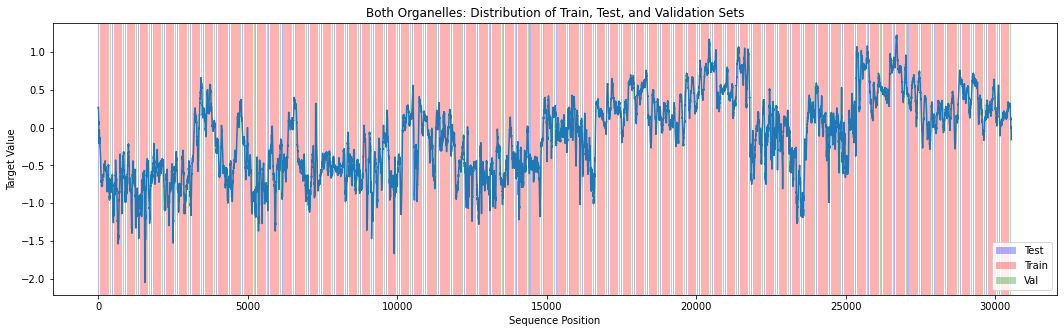

In [ ]:
# plot parts of sequences found in each set

fig = plt.figure(figsize=(18, 5))
fig.patch.set_facecolor('white')

plt.axvspan(test[0].index[0], test[0].index[-1], facecolor='b', alpha=0.3)
plt.axvspan(training[0].index[0], training[0].index[-1], facecolor='r', alpha=0.3)
plt.axvspan(validation[0].index[0], validation[0].index[-1], facecolor='g', alpha=0.3)

plt.legend(["Test", "Train", "Val"], loc="lower right")

for item in test[1:]:
    plt.axvspan(item.index[0], item.index[-1], facecolor='b', alpha=0.3)
    
for item in training[1:]:
    plt.axvspan(item.index[0], item.index[-1], facecolor='r', alpha=0.3)

for item in validation[1:]:
    plt.axvspan(item.index[0], item.index[-1], facecolor='g', alpha=0.3)
        
plt.plot(df_chloro[8])  # CHANGE TO CHANGE

plt.title("Both Organelles: Distribution of Train, Test, and Validation Sets")  # CHANGE TO CHANGE
plt.xlabel("Sequence Position")
plt.ylabel("Target Value")

plt.show()

In [ ]:
train = pd.concat(training)
train["set"] = "train"

In [ ]:
# if we want to get rid of outliers, cut all rows in train with abs z score value > 2

train['zscore'] = stats.zscore(train[8])

if cut_outliers:
    train = train[(train.zscore < 2) & (train.zscore > -2)]
    
train = train.drop(columns=["zscore"])

In [ ]:
val = pd.concat(validation)
val["set"] = "val"

In [ ]:
test = pd.concat(test)
test["set"] = "test"

In [ ]:

# test GC content
print("GC % mean in train set:", np.mean(train["avg"]))
print("GC % std dev of train set:", np.std(train["avg"]))
print()
print("GC % mean of val set:", np.mean(val["avg"]))
print("GC % std dev of val set:", np.std(val["avg"]))
print()
print("GC % mean of test set:", np.mean(test["avg"]))
print("GC % std dev of test set:", np.std(test["avg"]))

GC % mean in train set: 0.3660213238001994
GC % std dev of train set: 0.0851575327586333

GC % mean of val set: 0.3593491590257074
GC % std dev of val set: 0.08906818658524393

GC % mean of test set: 0.35156381841705575
GC % std dev of test set: 0.09800294734704139


In [ ]:
# see target summary stats
print("Target mean of train set:", np.mean(train[8]))
print("Target std dev of train set:", np.std(train[8]))
# print(np.mean(train[8]))
print()
print("Target mean of val set:", np.mean(val[8]))
print("Target std dev of val set:", np.std(val[8]))
# print(np.mean(val[8]))
print()
print("Target mean of test set:", np.mean(test[8]))
print("Target std dev of test set:", np.std(test[8]))
# print(np.mean(test[8]))

Target mean of train set: -0.11878874706954934
Target std dev of train set: 0.4644936933509107

Target mean of val set: -0.11311990212071778
Target std dev of val set: 0.5477377591821856

Target mean of test set: -0.11440048939641106
Target std dev of test set: 0.5617218266817865


In [ ]:
# create final dataset
final = pd.concat([train, val, test])

In [ ]:
final.shape[0]

24692

In [ ]:
final = final.sort_index()

In [ ]:
final

,organelle,start_coords,end_coords,sequence,control_raw_coverage,treatment_raw_coverage,control_norm_coverage,treatment_norm_coverage,target,A,T,C,G,CG,avg,set
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26,39,40,40,26,66,0.455172,test
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27,40,40,39,26,65,0.448276,test
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27,38,38,42,27,69,0.475862,test
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27,40,36,42,27,69,0.475862,test
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27,41,39,39,26,65,0.448276,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30539,NC_016734.1,152695,152840,GAGAAAATCGAATTTCTTTCTTCGTCTTAAAAAAAATAGGAGTTAA...,2239,555,759.00,712.22,-0.09,66,39,18,22,40,0.275862,val
30540,NC_016734.1,152700,152845,AATCGAATTTCTTTCTTCGTCTTAAAAAAAATAGGAGTTAATTAAC...,2115,514,716.97,659.61,-0.12,66,40,19,20,39,0.268966,val
30541,NC_016734.1,152705,152850,AATTTCTTTCTTCGTCTTAAAAAAAATAGGAGTTAATTAACTGTGA...,2062,492,699.00,631.38,-0.15,64,42,18,21,39,0.268966,val
30542,NC_016734.1,152710,152855,CTTTCTTCGTCTTAAAAAAAATAGGAGTTAATTAACTGTGACACGT...,2034,484,689.51,621.11,-0.15,62,39,21,23,44,0.303448,val


In [ ]:
final.columns = ["organelle", 
                 "start_coords", 
                 "end_coords", 
                 "sequence", 
                 "control_raw_coverage", 
                 "treatment_raw_coverage",
                 "control_norm_coverage",
                 "treatment_norm_coverage",
                 "target", 
                 "A", 
                 "T", 
                 "C", 
                 "G", 
                 "CG", 
                 "avg",
                 "set"]

In [ ]:
final = final.drop(columns=["CG","avg"])

In [ ]:
%ls

LICENSE                                 linear_mapping.ipynb
README.md                               logs/
__init__.py                             main.py
commands_for_setup.txt                  models/
create_final_dataset.ipynb              new_data/
cross_val_linear_mapping.ipynb          new_dataset_tests.ipynb
data/                                   new_dataset_tests_default_params.ipynb
data_exploration.ipynb                  new_dataset_tests_duplicate.ipynb
data_loader/                            new_dataset_tests_more_epochs.ipynb
evaluator/                              new_models/
example/                                new_scripts/
generate_data_format.ipynb              predict_on_NRC_data.ipynb
keras_model_loading.ipynb               requirements.txt
keras_retraining.ipynb                  requirements_exact.txt
keras_training.ipynb                    results.csv
kipoi/                                  trainers/
kipoi_playground.ipynb                  utils/


In [ ]:
final.to_csv(out_file_name, index=False)  # write to file

In [ ]:
pd.read_csv(out_file_name)